In [14]:
#pothole detection
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array 

**Adding Libraries**

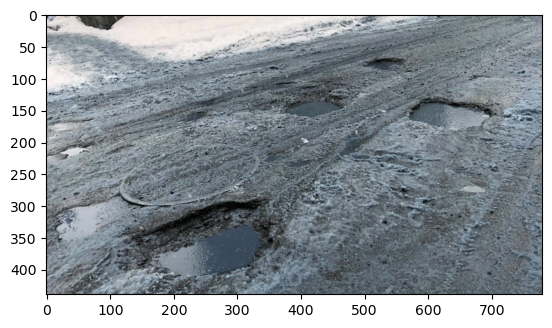

In [2]:
plt.imshow(cv2.imread("dataset/potholes/32.jpg"))

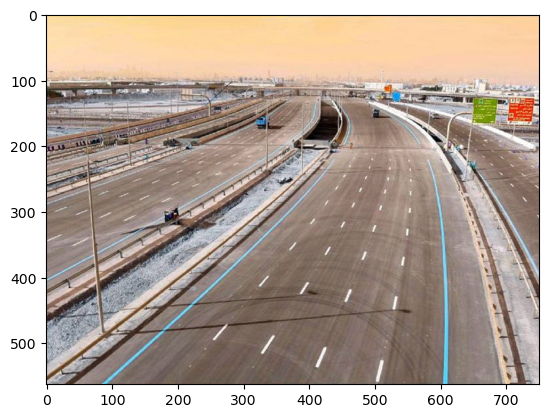

In [3]:
plt.imshow(cv2.imread("dataset/normal/11.jpg"))

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 546 images belonging to 2 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    "dataset", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


**Initialising the CNN**

In [7]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-07 21:33:03.871513: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-07 21:33:03.873213: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/25


2023-04-07 21:33:05.022489: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-07 21:33:05.275245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.5824

2023-04-07 21:33:16.173815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 13s 467ms/step - loss: 0.6652 - accuracy: 0.5824 - val_loss: 0.5932 - val_accuracy: 0.7111
Epoch 2/25
18/18 [==============================] - 7s 385ms/step - loss: 0.5245 - accuracy: 0.7381 - val_loss: 0.5087 - val_accuracy: 0.7333
Epoch 3/25
18/18 [==============================] - 7s 384ms/step - loss: 0.4243 - accuracy: 0.7985 - val_loss: 0.5195 - val_accuracy: 0.7704
Epoch 4/25
18/18 [==============================] - 7s 385ms/step - loss: 0.4133 - accuracy: 0.8223 - val_loss: 0.3734 - val_accuracy: 0.8370
Epoch 5/25
18/18 [==============================] - 7s 378ms/step - loss: 0.3152 - accuracy: 0.8718 - val_loss: 0.3699 - val_accuracy: 0.8815
Epoch 6/25
18/18 [==============================] - 7s 386ms/step - loss: 0.3153 - accuracy: 0.8663 - val_loss: 0.3694 - val_accuracy: 0.8370
Epoch 7/25
18/18 [==============================] - 7s 380ms/step - loss: 0.2786 - accuracy: 0.8846 - val_loss: 0.3234 - val_accuracy: 0.8667
Epoch 8/25
18/18

**Making a single prediction (RESULT)**

In [19]:
test_image = load_img("test/mulus.jpeg", target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

#final result 
print(prediction)

1/1 [==============================] - 0s 13ms/step
normal


In [22]:
# save model using pickle
import pickle
filename = 'finalized_model.sav'
pickle.dump(cnn, open(filename, 'wb'))


INFO:tensorflow:Assets written to: ram://f0315d16-56b9-4773-a59c-21e46ec7bbba/assets


INFO:tensorflow:Assets written to: ram://f0315d16-56b9-4773-a59c-21e46ec7bbba/assets


In [ ]:
# load the model from disk


In [23]:
# load model
from keras.models import load_model
model = load_model('finalized_model.sav')

# predict
test_image = load_img("test/mulus.jpeg", target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'pothole'
else:
    prediction = 'normal'

#final result
print(prediction)

OSError: Unable to open file (file signature not found)